# 1 Covid-19 Data visualization<a id='1_data_visualization'></a>

## 1.1 Contents<a id='1.1_contents'></a>
* [1 Covid-19 Data Collection and Wrangling](#1_data_collection_wrangling)
  * [1.1 Contents](#1.1_contents)  

## 1.2 Imports<a id='1.2_imports'></a>

In [1]:
from collections import defaultdict
from pathlib import Path
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import pickle
from pathlib import Path
from deepdiff import DeepDiff
from pandas.tseries.holiday import USFederalHolidayCalendar as holidayCalendar
from wwo_hist import retrieve_hist_data
import pycountry
import holidays
from countryinfo import CountryInfo
%matplotlib inline

## 1.4 Load data - mobility, case, vaccination, holiday <a id='1.4_load_data'></a>

In [103]:
# load the saved dictionary from pickle file
filePath_pickle = Path('/Users/parkj/Documents/pyDat/dataSet/covid_country_data.pickle')
with open(filePath_pickle, 'rb') as f:
    dict_country = pickle.load(f)

#### Time Series Visualization: US data

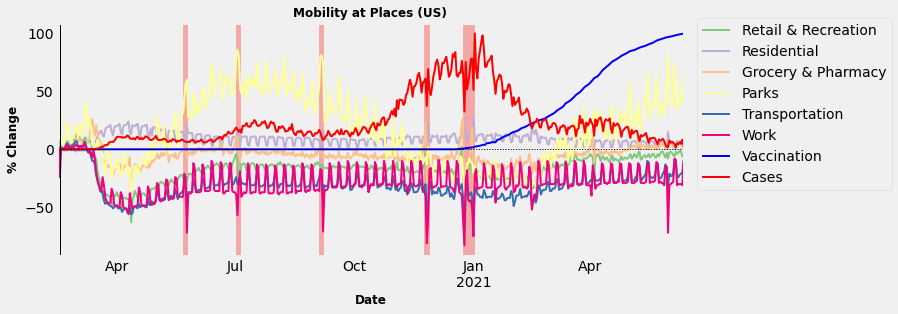

In [40]:
# grab one country's dataframe 
df = country_dict["United States"] # data frame for US

# Visualize US Mobility data
cmp = cm.get_cmap('Accent', 10)
thisCmp = np.concatenate((cmp.colors[1:7], [[0, 0, 1., 1.],[1., 0, 0, 1.]]), axis=0)
plt.style.use('fivethirtyeight')
ax = df[['rtrc','resi','grph','prks','tran','work','vac_percMax','case_mil_percMax']].plot(color=thisCmp \
                                                                                    , linewidth=2, figsize=(10, 4))
ax.set_title('Mobility at Places (US)', fontweight='bold', fontsize=12)
ax.set_xlabel('Date', fontweight='bold', fontsize=12)
ax.set_ylabel('% Change', fontweight='bold', fontsize=12)
ax.axvspan('2020-05-22', '2020-05-25', color='red', alpha=0.3)
ax.axvspan('2020-07-02', '2020-07-05', color='red', alpha=0.3)
ax.axvspan('2020-09-04', '2020-09-07', color='red', alpha=0.3)
ax.axvspan('2020-11-24', '2020-11-28', color='red', alpha=0.3)
ax.axvspan('2020-12-24', '2021-01-01', color='red', alpha=0.3)
ax.axvline(df.index[2], color='black', linewidth=1)
ax.axhline(0, color='black', linewidth=1, linestyle=':')
ax.grid(False)
#ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1.05))
l = ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1.05))
l.get_texts()[0].set_text('Retail & Recreation')
l.get_texts()[1].set_text('Residential')
l.get_texts()[2].set_text('Grocery & Pharmacy')
l.get_texts()[3].set_text('Parks')
l.get_texts()[4].set_text('Transportation')
l.get_texts()[5].set_text('Work')
l.get_texts()[6].set_text('Vaccination')
l.get_texts()[7].set_text('Cases')
plt.show()

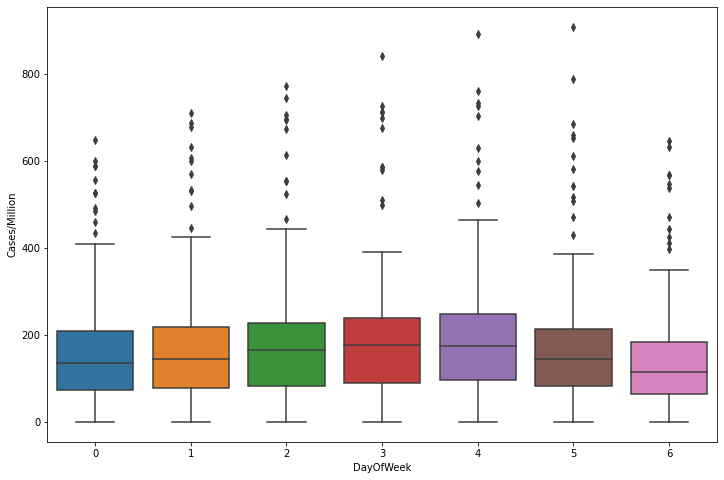

In [13]:
# Boxplot the number of cases/million by the day of week
plt.subplots(figsize=(12, 8))
sns.boxplot(x='dayow', y='case_mil', data=df[['dayow','case_mil']]) # 0 = Monday
plt.ylabel('Cases/Million')
plt.xlabel('DayOfWeek');